In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data=pd.read_csv("bank-full.csv",encoding = 'utf-8',delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA and Visualisation

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#checking with type of the data
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#check the null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#check the duplicate values
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
data2 = pd.get_dummies(data,columns=['job','marital','education','poutcome','contact','month'])
data2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# custom binary encoding of binary op variables
data2['default'] = np.where(data2['default'].str.contains("yes"),1,0)
data2['housing'] = np.where(data2['housing'].str.contains("yes"),1,0)
data2['loan'] = np.where(data2['loan'].str.contains("yes"),1,0)
data2['y'] = np.where(data2['y'].str.contains("yes"),1,0)

In [10]:
#to check all columns
pd.set_option("display.max.columns",None)
data2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
data2.shape

(45211, 49)

In [12]:
#splitting our variables into x and y
x=data2.iloc[:,:-1]
y=data2.iloc[:,-1]


In [13]:
model_1 = LogisticRegression()

In [14]:
rfe = RFE(model_1)

In [15]:
fit = rfe.fit(x,y)

C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [16]:
fit.n_features_

24

In [17]:
#selected features
fit.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
#Ranking the feature
fit.ranking_

array([17,  1, 25,  1,  1, 20, 24,  6, 23, 19,  1,  1,  1, 16, 11,  1,  1,
        8,  1,  1, 18,  7,  1,  1, 15, 14, 22,  9, 12,  2, 10,  5,  3,  1,
       21,  4, 13,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
#checking columns required
for i,col in zip(range(x.shape[1]),x.columns):
    print(f"{col} selected = {fit.support_[i]} rank = {fit.ranking_[i]}")

age selected = False rank = 17
default selected = True rank = 1
balance selected = False rank = 25
housing selected = True rank = 1
loan selected = True rank = 1
day selected = False rank = 20
duration selected = False rank = 24
campaign selected = False rank = 6
pdays selected = False rank = 23
previous selected = False rank = 19
y selected = True rank = 1
job_admin. selected = True rank = 1
job_blue-collar selected = True rank = 1
job_entrepreneur selected = False rank = 16
job_housemaid selected = False rank = 11
job_management selected = True rank = 1
job_retired selected = True rank = 1
job_self-employed selected = False rank = 8
job_services selected = True rank = 1
job_student selected = True rank = 1
job_technician selected = False rank = 18
job_unemployed selected = False rank = 7
job_unknown selected = True rank = 1
marital_divorced selected = True rank = 1
marital_married selected = False rank = 15
marital_single selected = False rank = 14
education_primary selected = False 

In [20]:
#selecting our columns from elimination method
data3 = data2[["default","housing","loan","job_blue-collar","job_unknown","job_retired",
                      "job_services","education_primary","education_secondary","poutcome_failure",
                        "poutcome_success","month_apr",
                         "month_dec","month_feb",
                          "month_jul","month_jun","month_mar",
                           "month_may","month_oct","y"]]

In [21]:
data3.head()

,default,housing,loan,job_blue-collar,job_unknown,job_retired,job_services,education_primary,education_secondary,poutcome_failure,poutcome_success,month_apr,month_dec,month_feb,month_jul,month_jun,month_mar,month_may,month_oct,y
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
#checking the shape of our data
data3.shape

(45211, 20)

# Validations using Kfold

In [23]:
#validation of the selected features in the dataset
array = data3.values
x = array[:,0:19]
y = array[:,19]

In [24]:
kfold = KFold(n_splits = 10)
model_2 = LogisticRegression()
results = cross_val_score(model_2,x,y,cv = kfold)
results

array([0.97014595, 0.96261889, 0.95178058, 0.9358549 , 0.93895156,
       0.93452776, 0.89095333, 0.86817076, 0.84251272, 0.53948242])

In [25]:
results.mean()*100

88.34998861766617

In [26]:
#rechecking our selected ccolumns with information gain plot
data4 = data3[["default","housing","loan","job_blue-collar","job_unknown","job_retired",
                  "job_services","education_primary","education_secondary","poutcome_failure",
                   "poutcome_success","month_apr",
                   "month_dec","month_feb",
                   "month_jul","month_jun","month_mar",
                   "month_may","month_oct","y"]]

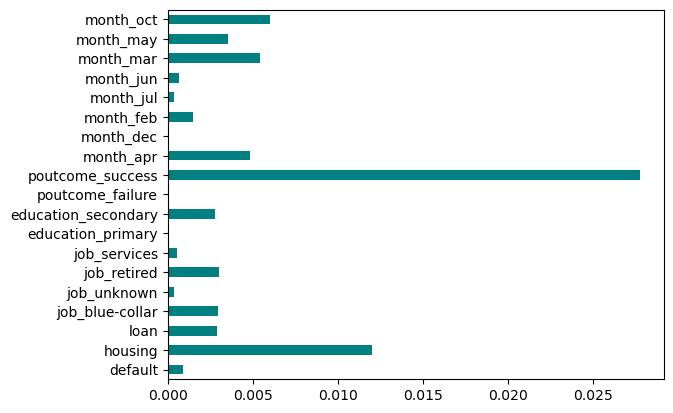

In [27]:
#plotting our information gain plot
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(x,y)
feat_importances = pd.Series(importances,data3.columns[0:len(data3.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()

# Building our final model with accuracy 88.34%

In [28]:
x = data3.iloc[:,:-1]
y= data3.iloc[:,-1]

In [29]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

# Predictions

In [30]:
#computing our predictions on term deposit
y_pred = model.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
#storing our actual and predicted values
y_pred2 = pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred2.head()

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# testing the model accuracy

In [32]:
#confusion matrix on our model
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39420,   502],
       [ 4335,   954]], dtype=int64)

In [33]:
#model accuracy is calculated as (a+d)/(a+b+c+d)
(39420+954)/(39420+502+954+4335)

0.8930127623808365

In [34]:
model.predict_proba(x)[:,1]

array([0.06784361, 0.0578082 , 0.03730793, ..., 0.71313065, 0.09794074,
       0.11451808])

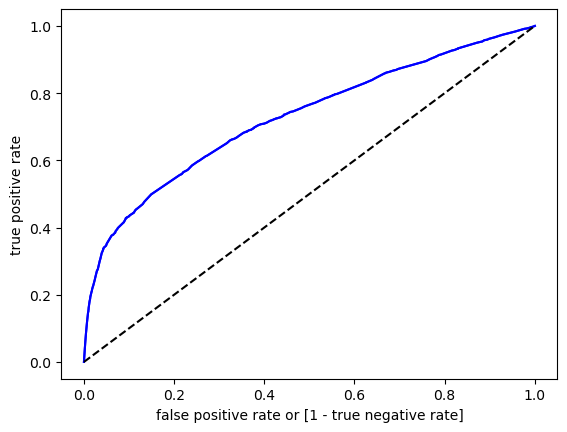

auc accuracy: 0.5838999207842701


In [35]:
#ROC curve plotting and finding AUC score 
fpr,tpr,thresholds = roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color = 'blue')
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color = 'blue',label = 'logit model(area =% 0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1 - true negative rate]')
plt.ylabel('true positive rate')
plt.show()

print('auc accuracy:', auc)

In [36]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.66      0.18      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.78      0.58      0.61     45211
weighted avg       0.87      0.89      0.87     45211

